## Maszynowa analiza danych 2022/2023
### Laboratorium 3 
<i> Antoni Perużyński </i>  
<i> Informatyka Stacjonarne </i>

### Zadanie 1

Proszę przygotować rozwiązanie (program, funkcję, polecenie) w języku Python, które pozwoli na segmentację modeli samochodów, za pomocą poznanych metod grupowania.

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles

from sklearn.preprocessing import StandardScaler

## Przygotowanie danych

#### Wczytanie danych

In [ ]:
df = pd.read_csv('auta.csv', index_col = 0)
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,20900.0,164450.0,1896.0,110,66.9
Audi A4,25311.4,182000.0,1900.0,130,75.7
Audi A6,31500.0,185000.0,2496.0,170,82.5
Audi A8,109000.0,129380.0,4134.0,300,68.1
Audi Q7,179000.0,72000.0,3000.0,240,89.1


#### Standaryzacja danych

In [ ]:
z = StandardScaler()
auta = df.copy()
auta[auta.columns] = z.fit_transform(df[df.columns])
auta.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


## Grupowanie metodą KMeans

In [ ]:
km = KMeans(n_clusters = 2).fit(auta)
df['klastry_km'] = km.labels_
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle,klastry_km,klastry_gm,klastry_db
Audi A3,20900.0,164450.0,1896.0,110,66.9,0,1,0
Audi A4,25311.4,182000.0,1900.0,130,75.7,0,2,0
Audi A6,31500.0,185000.0,2496.0,170,82.5,0,2,-1
Audi A8,109000.0,129380.0,4134.0,300,68.1,1,0,-1
Audi Q7,179000.0,72000.0,3000.0,240,89.1,1,0,-1


In [ ]:
sylwetka_km = round(silhouette_score(auta, km.labels_), 4)

print("Wartość sylwetki dla metody K-Means dla 2 klastrów wynosi:", sylwetka_km)

Wartość sylwetki dla metody K-Means dla 2 klastrów wynosi: 0.6241


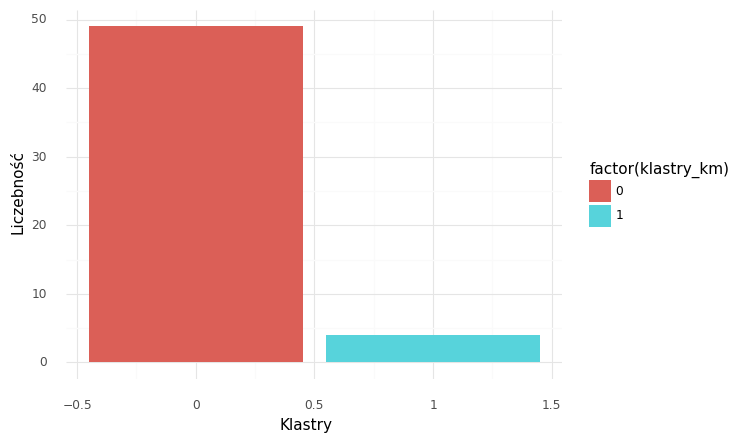

<ggplot: (8746869315993)>

In [ ]:
(ggplot(df, aes(x = 'klastry_km', fill = 'factor(klastry_km)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

Z wykresu można odczytać, że grupy na które zostały podzielone analizowane obiekty nie są równoliczne. Istnieje bardzo duża dysproporcja i tak naprawdę udało się nam wyodrębnić tylko pewną "podgrupę" zawierającą kilka (koło 3) elementów od reszty.

Sprawdźmy teraz jak zachowują się wartości dla poszczególnych featursów w każdej z grupy. 

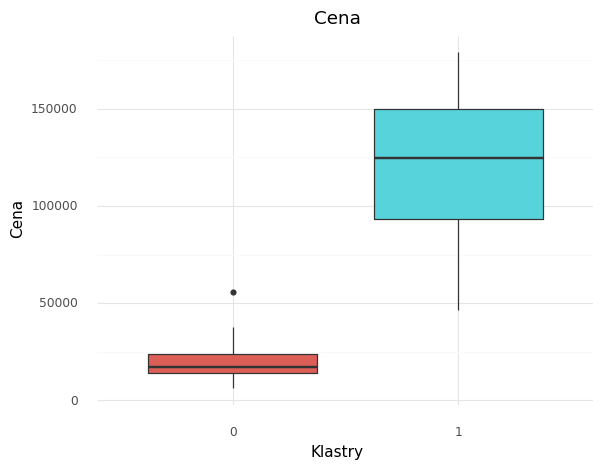

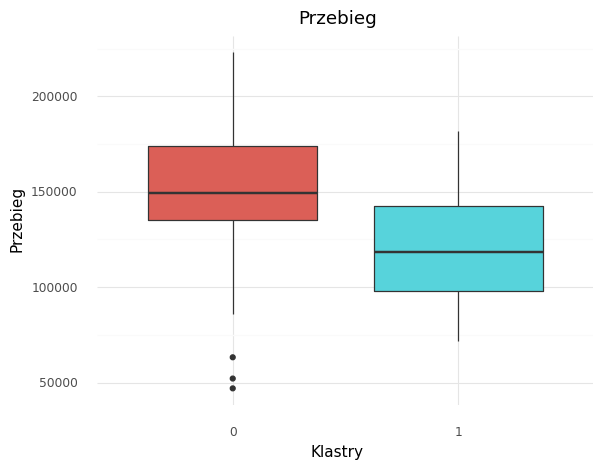

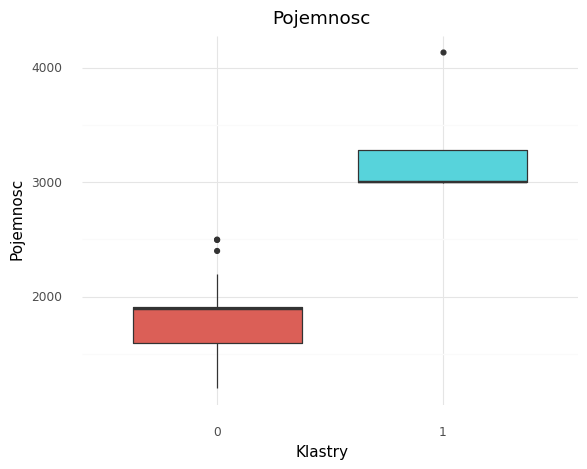

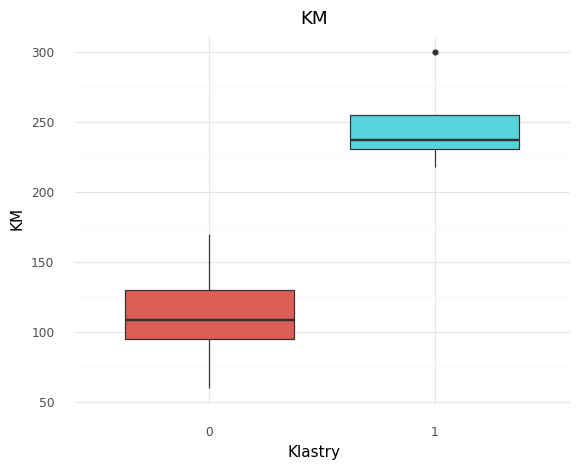

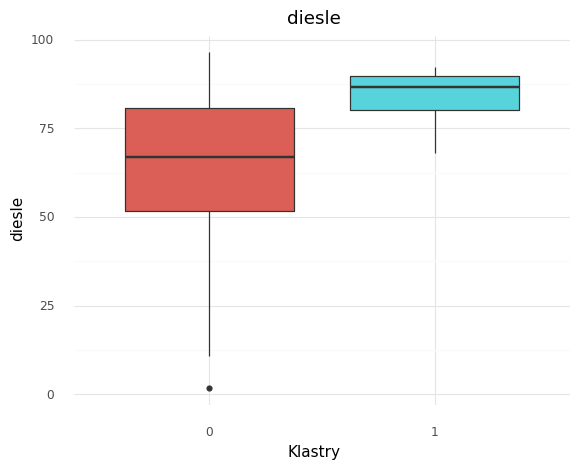

In [ ]:
for zm in df.columns[:-1]:
  print((ggplot(df, aes(x='factor(klastry_km)', y= zm, fill = 'factor(klastry_km)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

Grupa 0 charateryzuje się niską ceną, wyższym przebiegiem, małą pojemnością silnika, mniejszą ilością KM. - Do tej grupy należy większa część badanych obiektów.

Grupa 1 charakteruzyje się wyższą ceną, niższym przebiegiem, wyższą pojemnością silnika oraz większą ilośćią KM. Do tej grupy należy tylko kilka obiektów, wszystkie te cechy mogą świadczyć o tym, że do tej grupy należą auta "Premium".

#### Podobne analizy można wykonać za pomocą algorytmów GMM oraz DBSCAN. Przejdę jednak do eksperymentów znajdujących się w dalszej części zadania, w których zastosowałem różne podejścia do analizy tych metod.

## Grupowanie za pomocą GMM

In [ ]:
gm = GaussianMixture(n_components = 2).fit(auta)

df['klastry_gm'] = gm.predict(auta)
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle,klastry_km,klastry_gm
Audi A3,20900.0,164450.0,1896.0,110,66.9,0,1
Audi A4,25311.4,182000.0,1900.0,130,75.7,0,1
Audi A6,31500.0,185000.0,2496.0,170,82.5,0,0
Audi A8,109000.0,129380.0,4134.0,300,68.1,1,0
Audi Q7,179000.0,72000.0,3000.0,240,89.1,1,0


In [ ]:
sylwetka_gm= round(silhouette_score(auta, gm.predict(auta)), 4)

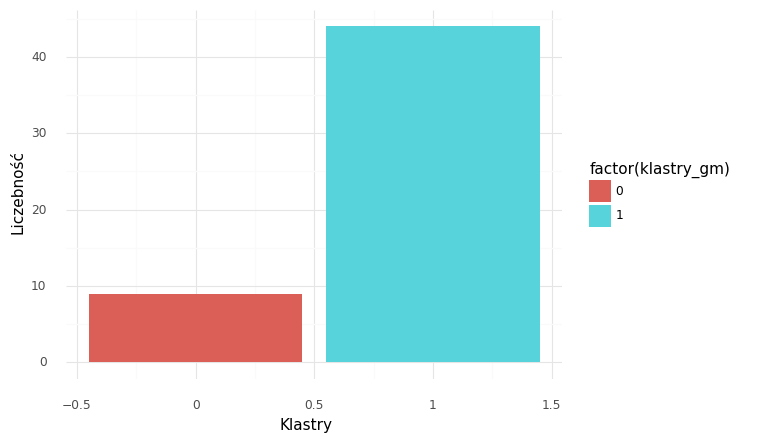

<ggplot: (8746873940009)>

In [ ]:
(ggplot(df, aes(x = 'klastry_gm', fill = 'factor(klastry_gm)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

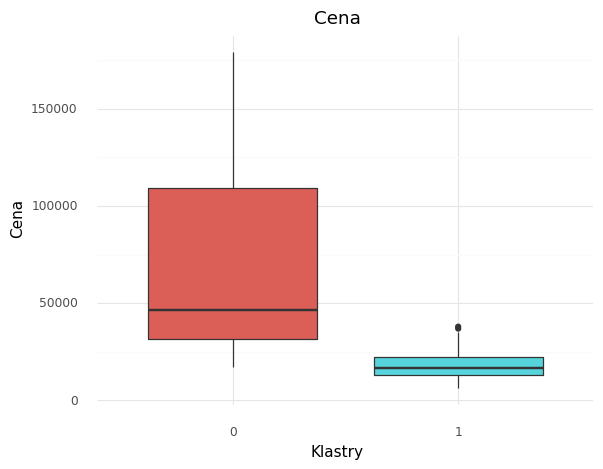

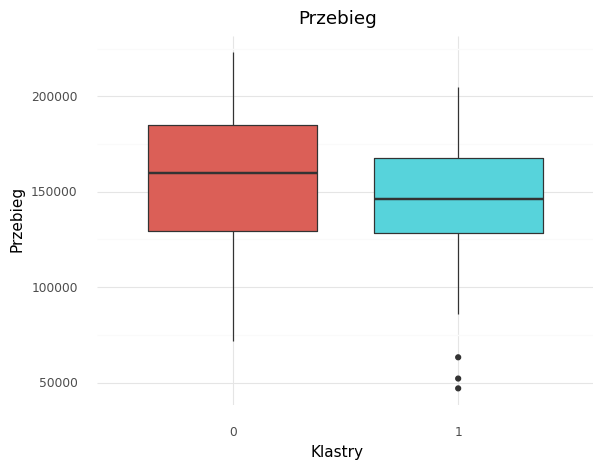

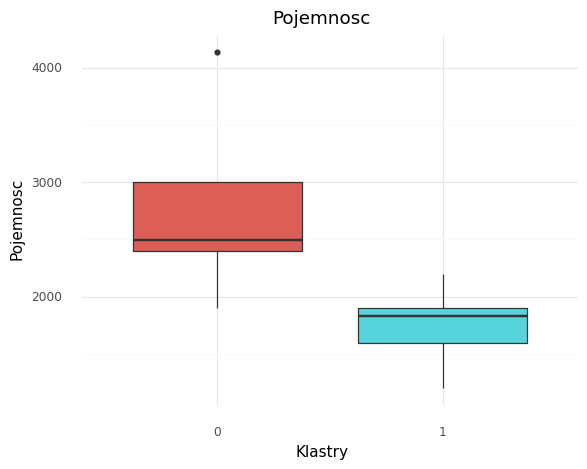

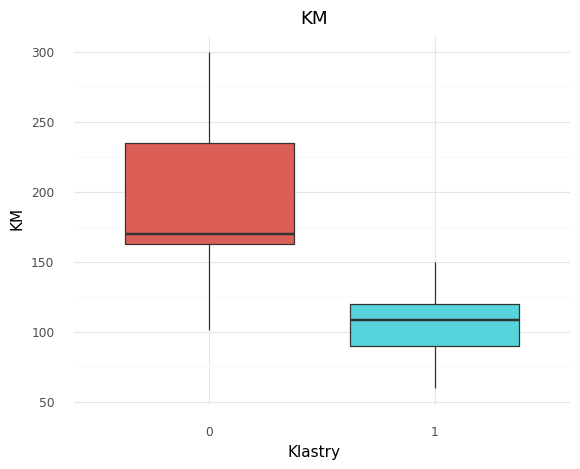

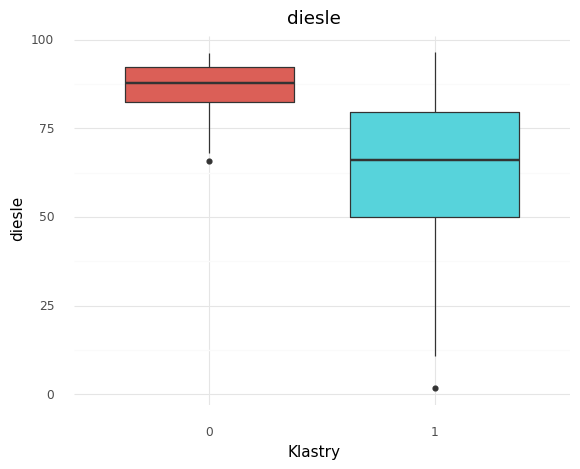

In [ ]:
for zm in df.columns[:-2]:
  print((ggplot(df, aes(x='factor(klastry_gm)', y= zm, fill = 'factor(klastry_gm)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

##Grupowanie za pomocą DBSCAN

In [ ]:
db = DBSCAN(eps = 2, min_samples = 5 ).fit(auta)
df['klastry_db'] = db.labels_
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle,klastry_km,klastry_gm,klastry_db
Audi A3,20900.0,164450.0,1896.0,110,66.9,0,1,0
Audi A4,25311.4,182000.0,1900.0,130,75.7,0,1,0
Audi A6,31500.0,185000.0,2496.0,170,82.5,0,0,0
Audi A8,109000.0,129380.0,4134.0,300,68.1,1,0,-1
Audi Q7,179000.0,72000.0,3000.0,240,89.1,1,0,-1


In [ ]:
sylwetka_db = round(silhouette_score(auta, db.labels_), 4)

In [ ]:
sylwetka_db

0.6572

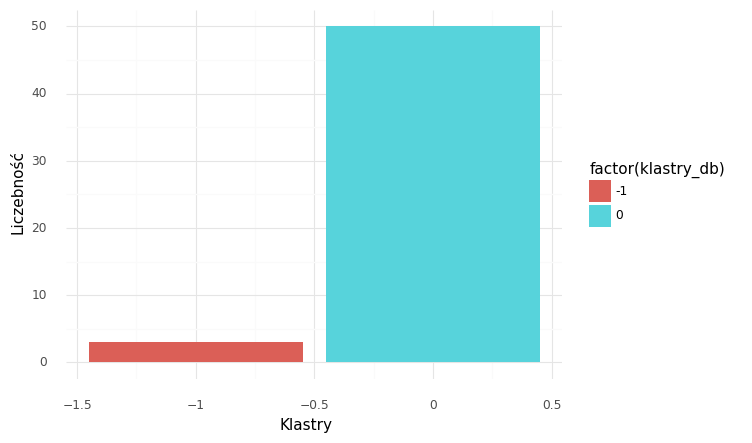

<ggplot: (8746870863013)>

In [ ]:
(ggplot(df, aes(x = 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

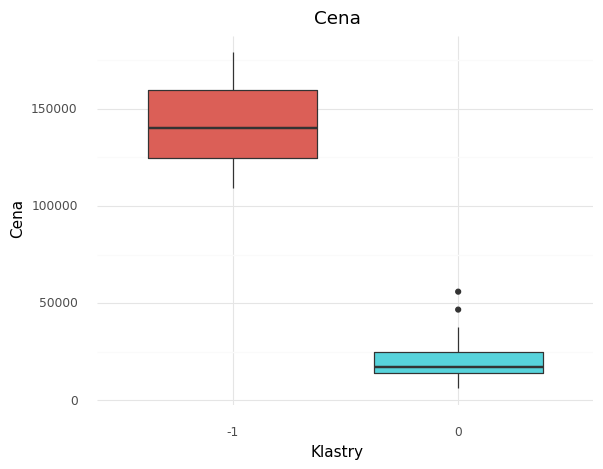

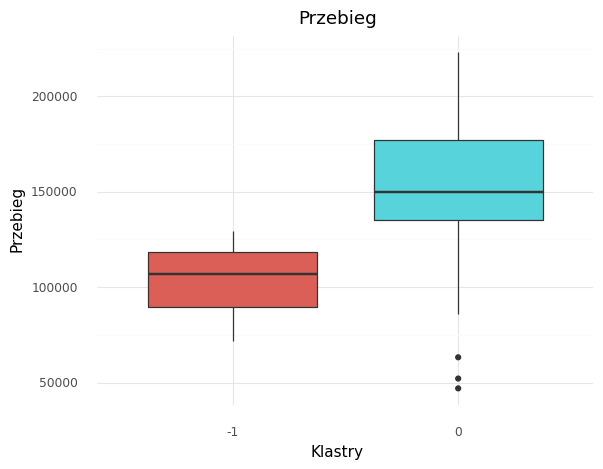

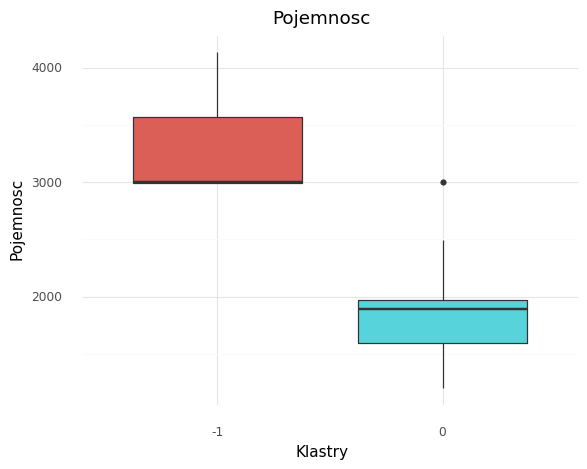

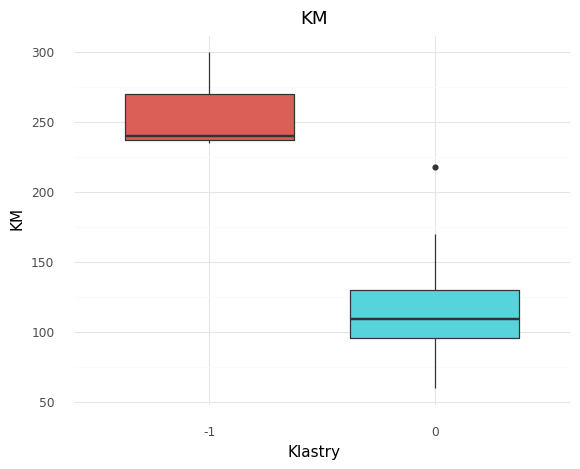

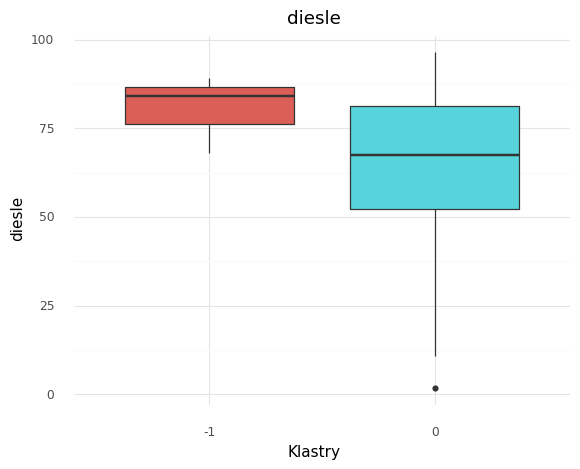

In [ ]:
for zm in df.columns[:-3]:
  print((ggplot(df, aes(x='factor(klastry_db)', y= zm, fill = 'factor(klastry_db)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

In [ ]:
print(sylwetka_km)
print(sylwetka_gm)
print(sylwetka_db)

0.6241
0.4342
0.6572


## Testowanie

### KMeans

Spójrzmy jak kształtują się wykresy ilości obiektów w poszcególnych klastrach w zależności od ich ilości

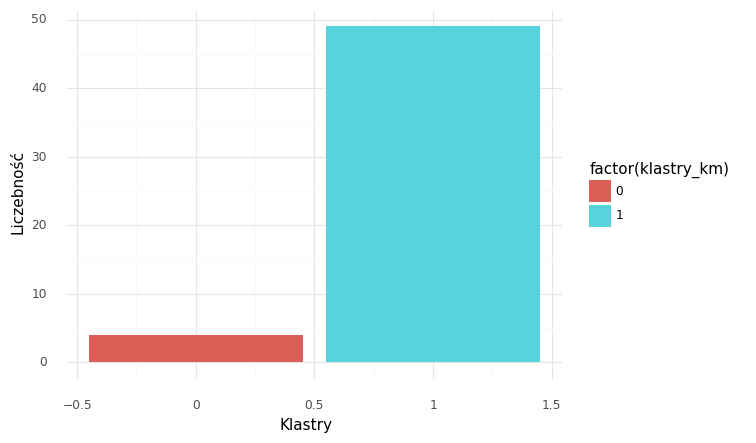

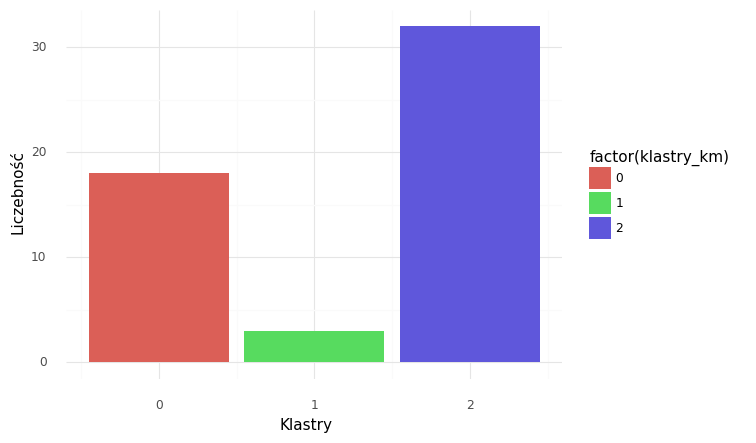

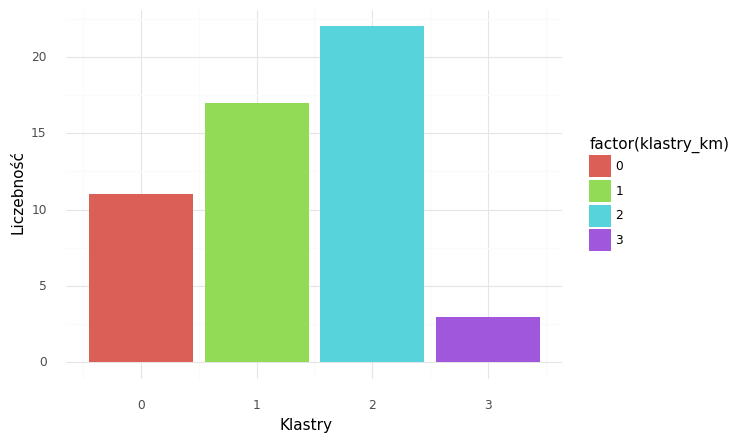

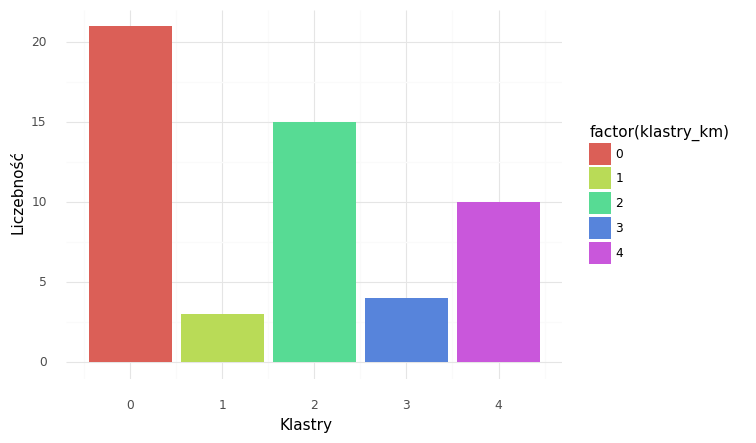

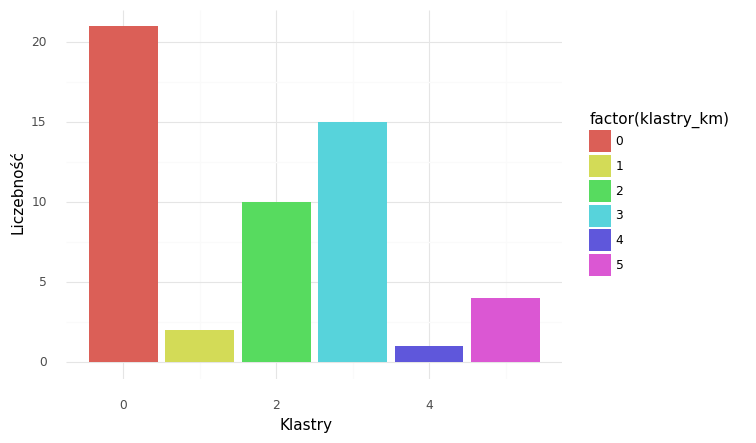

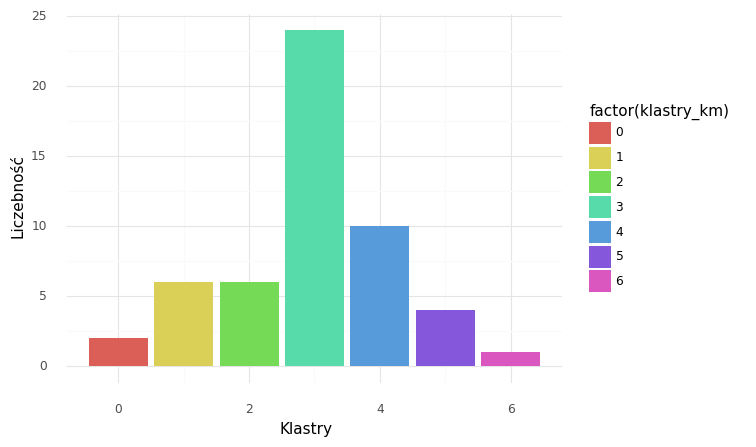

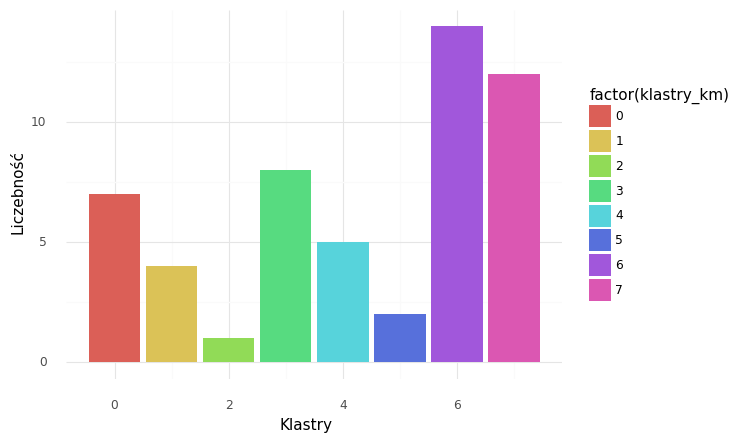

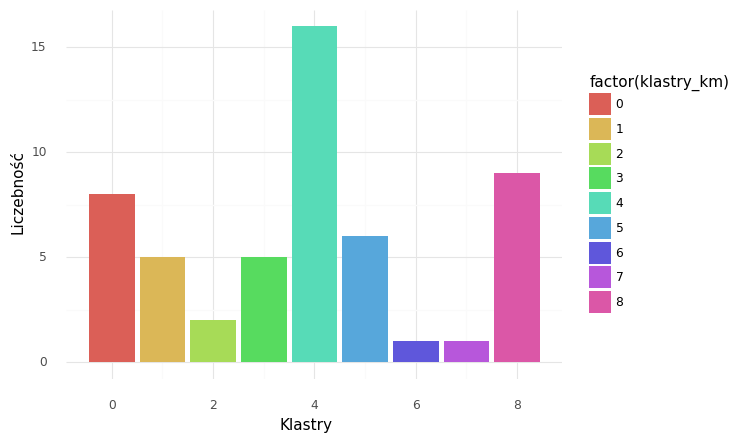

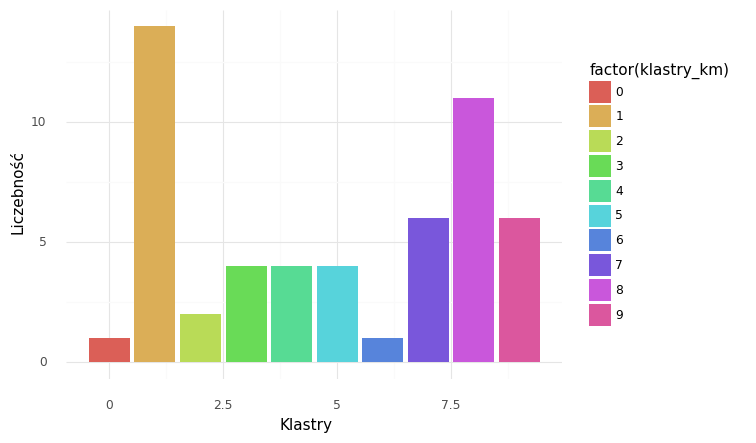

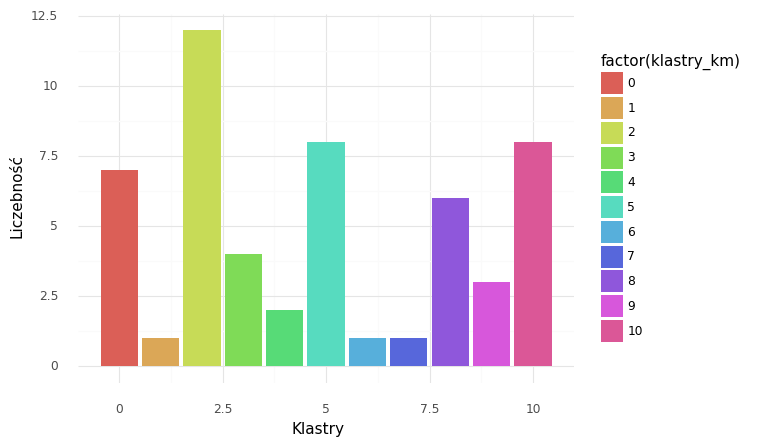

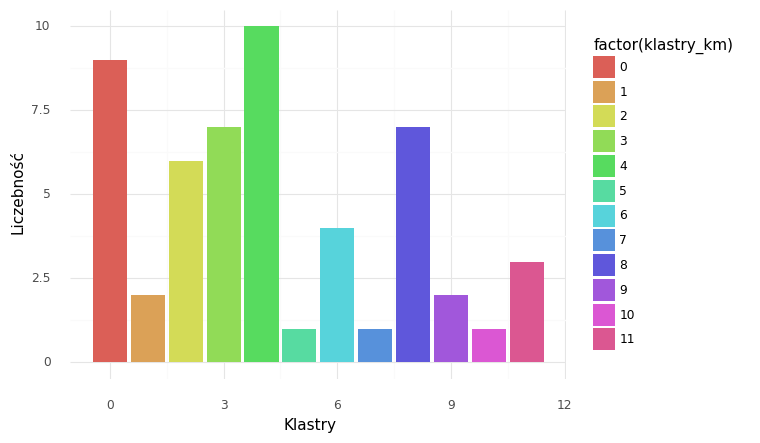

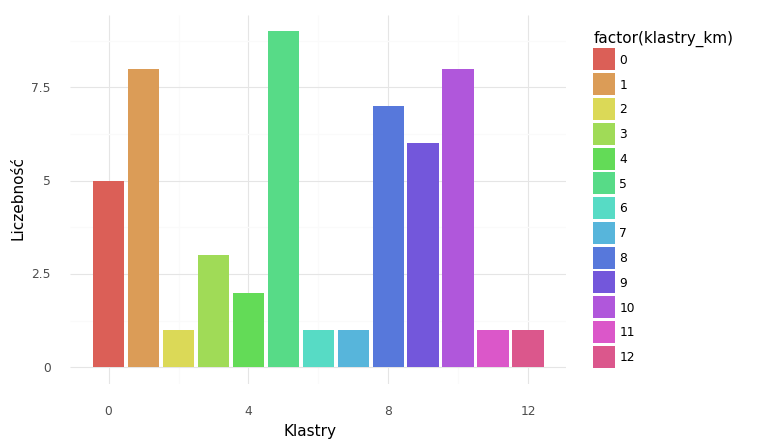

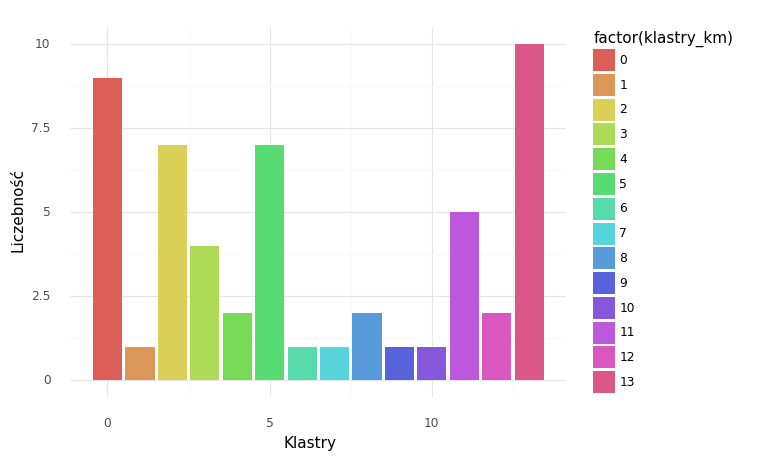

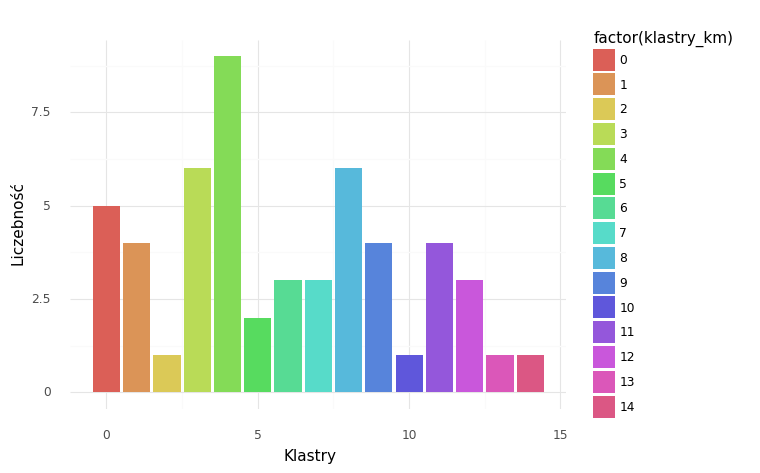

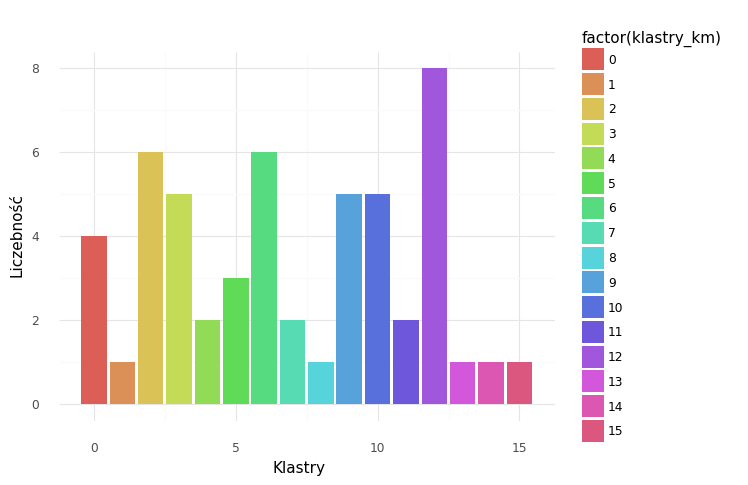

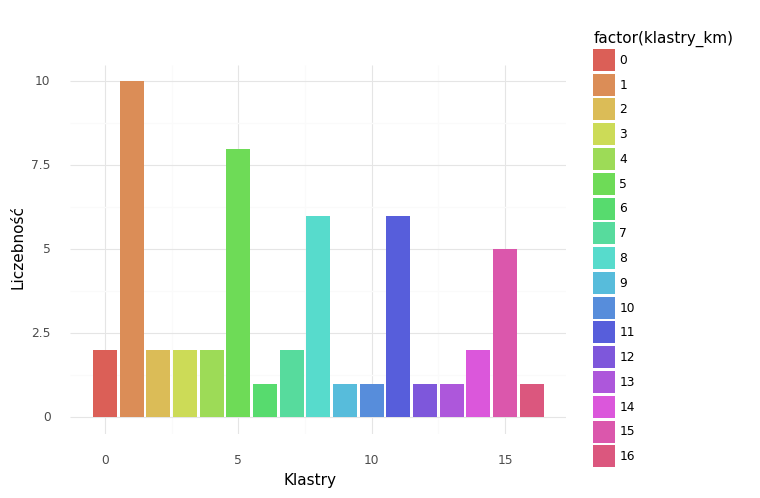

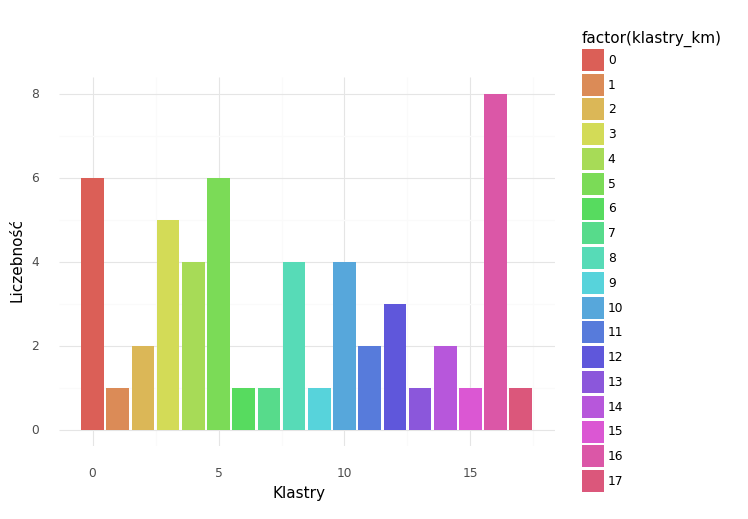

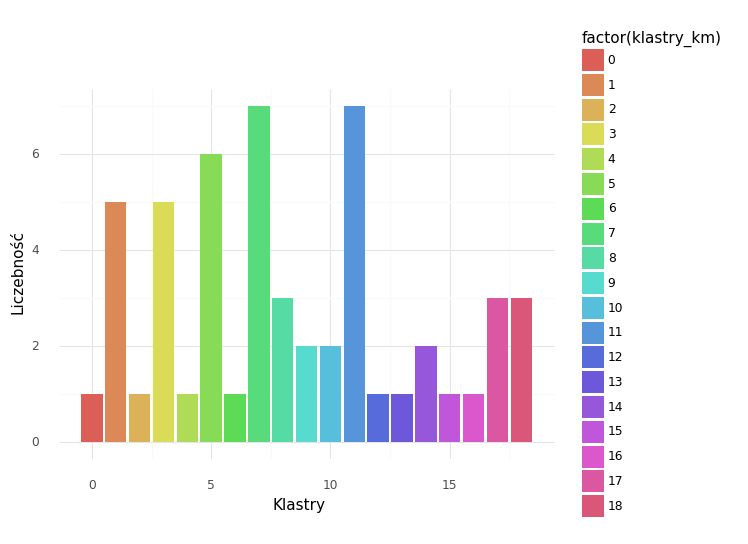

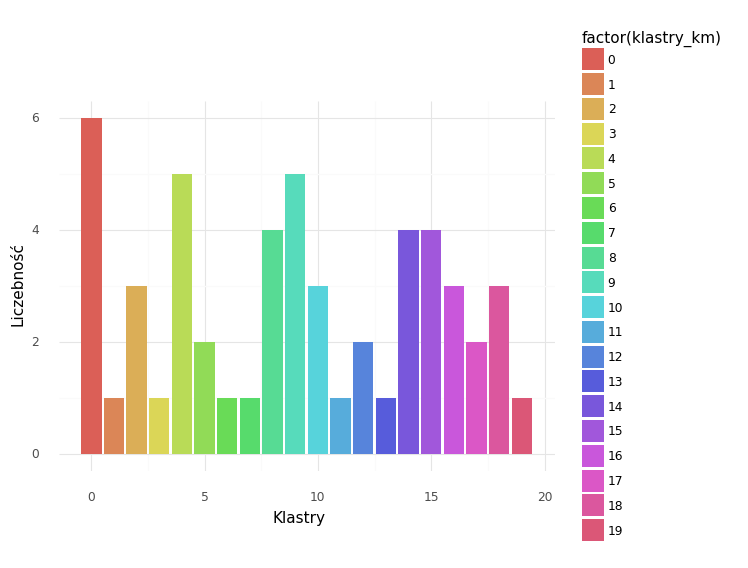

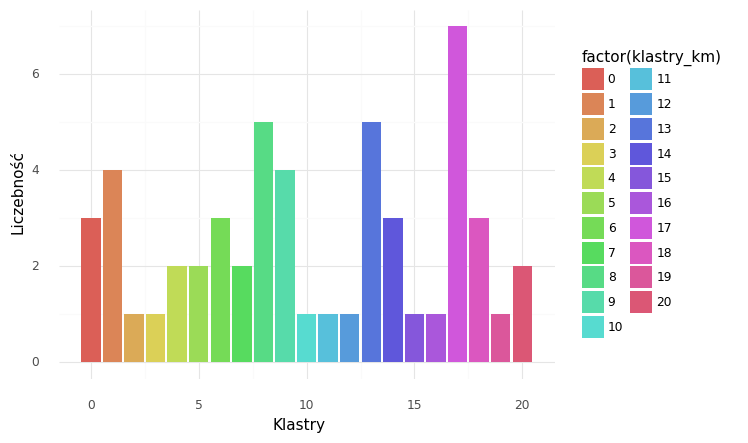

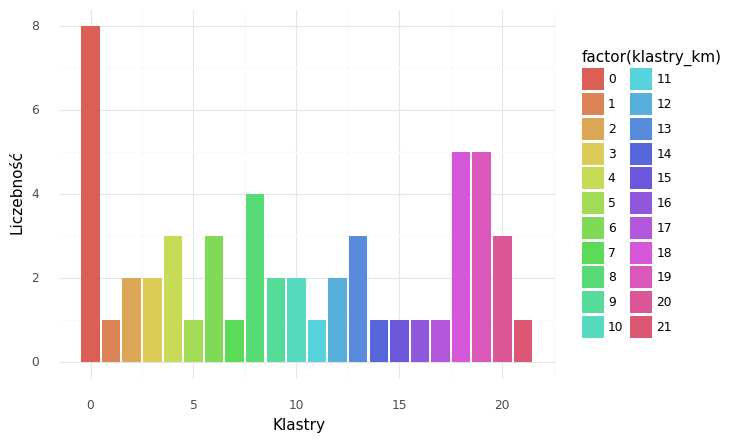

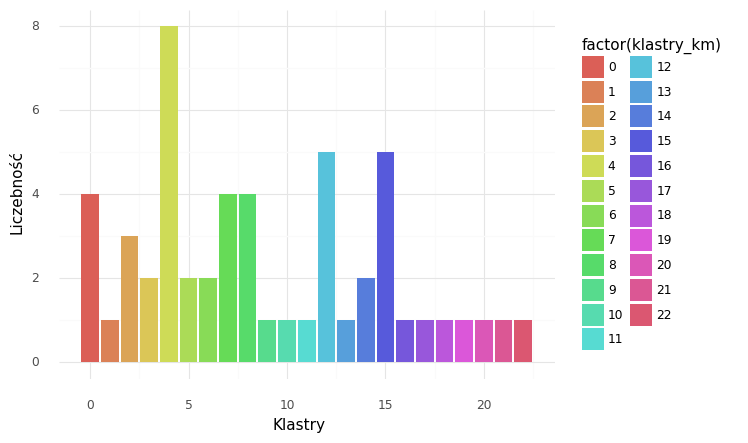

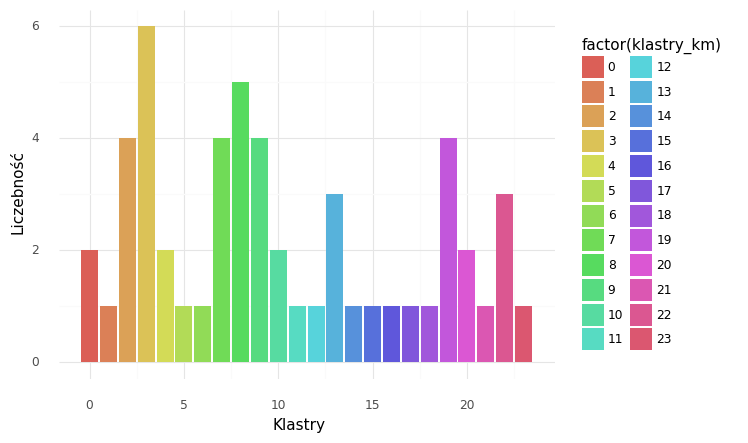

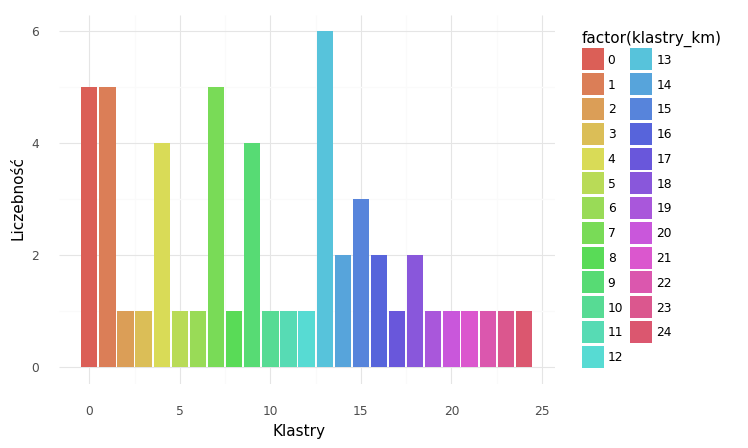

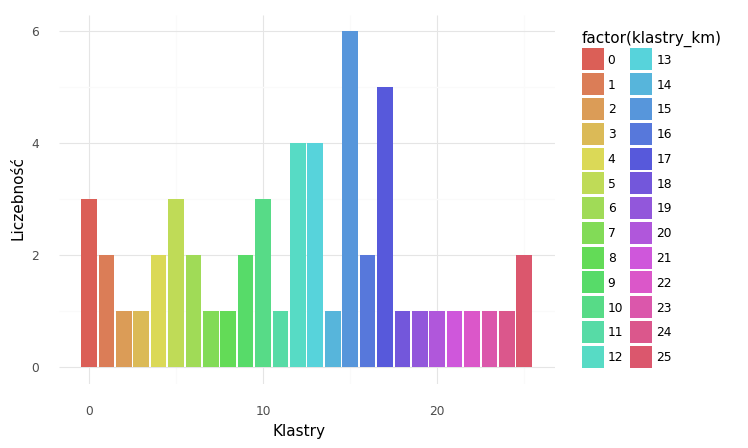

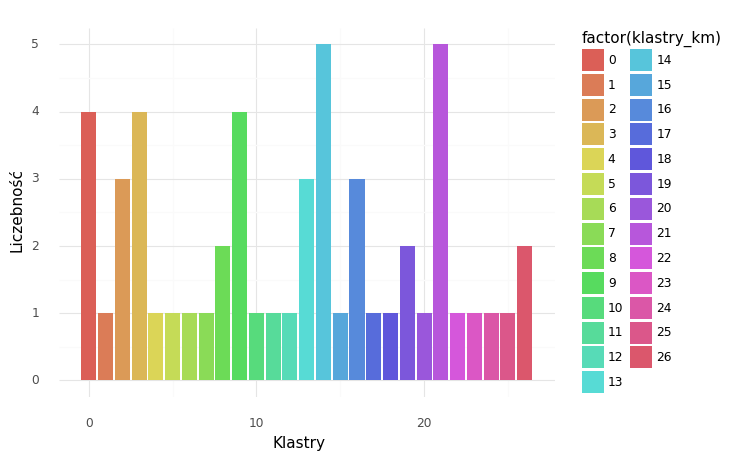

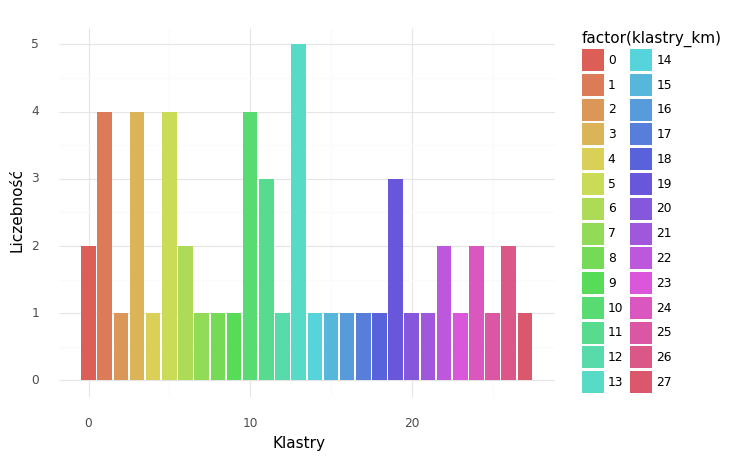

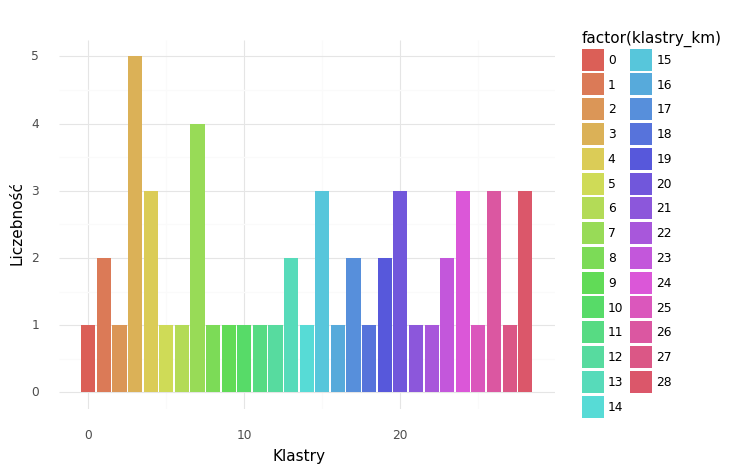

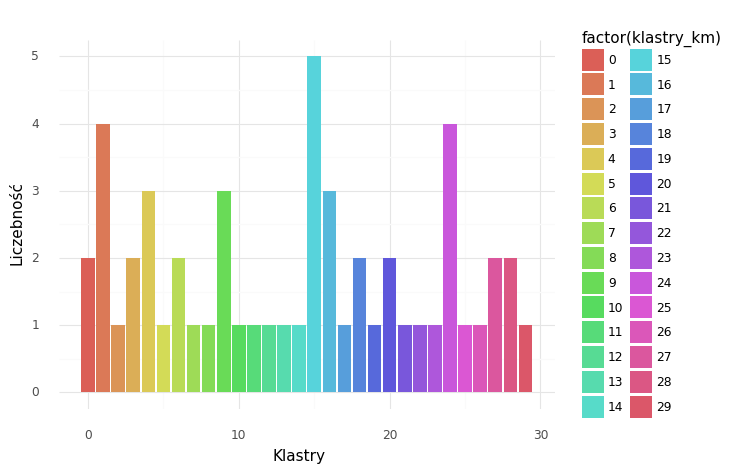

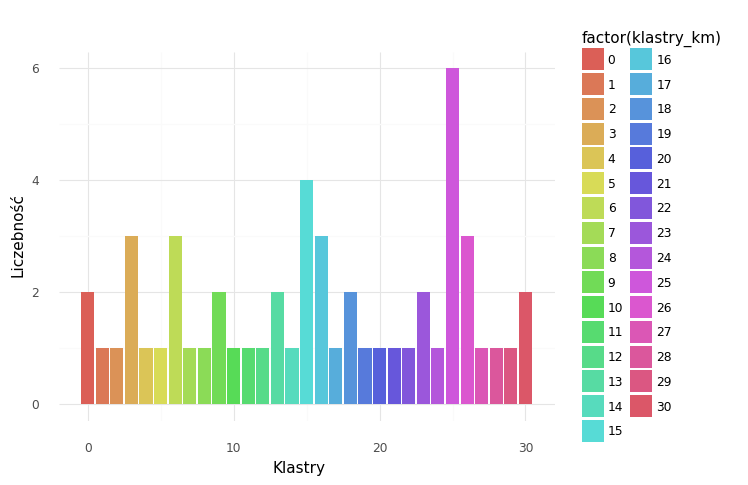

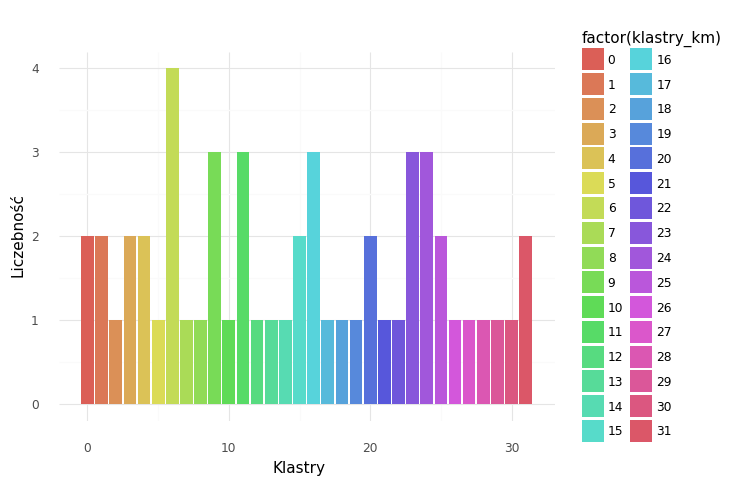

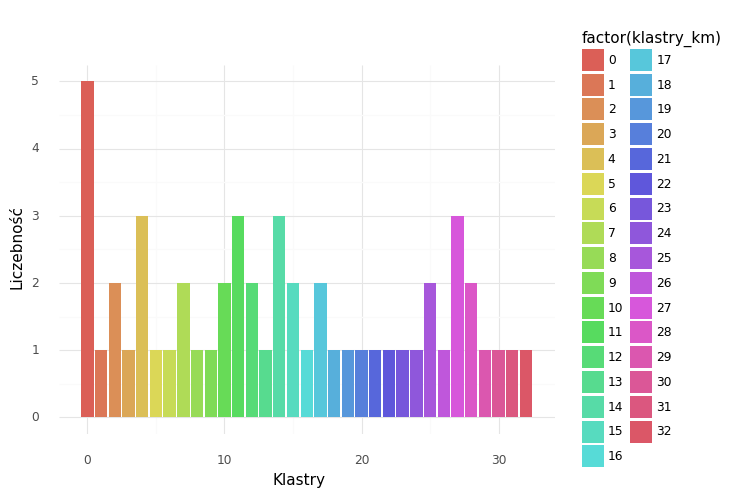

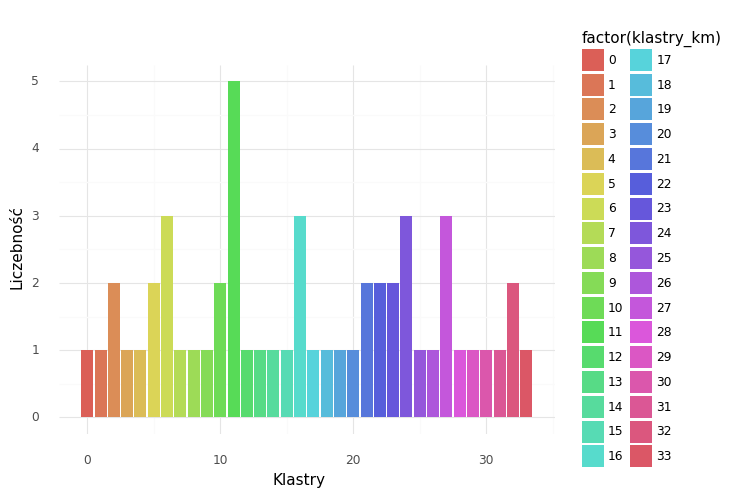

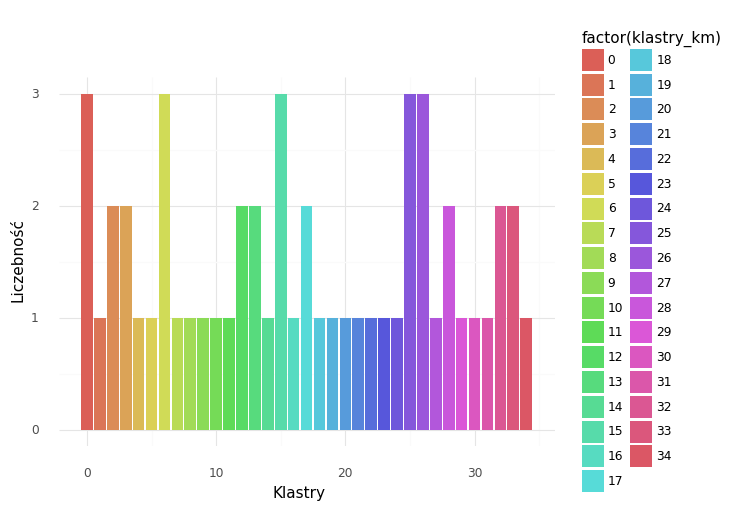

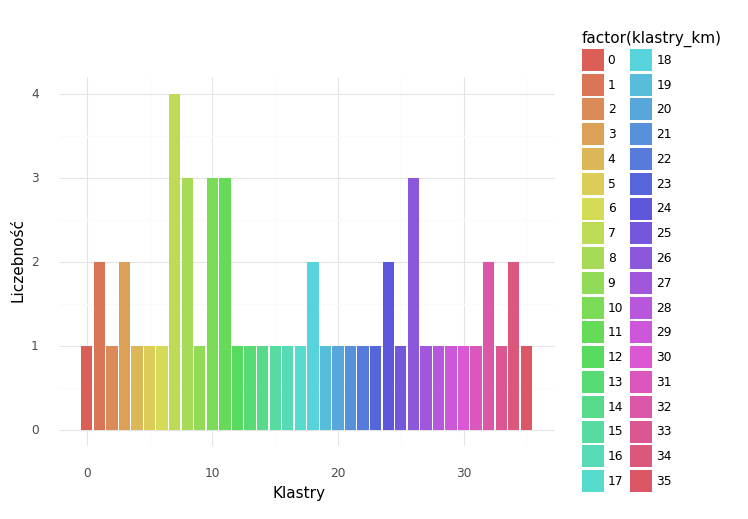

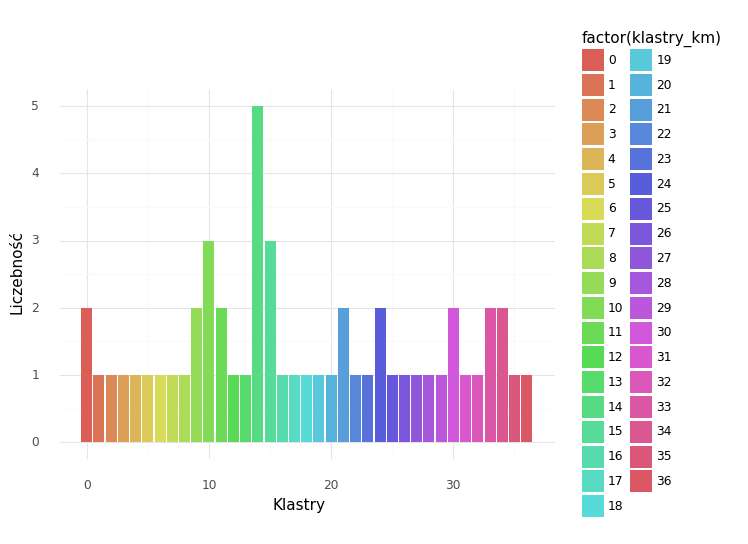

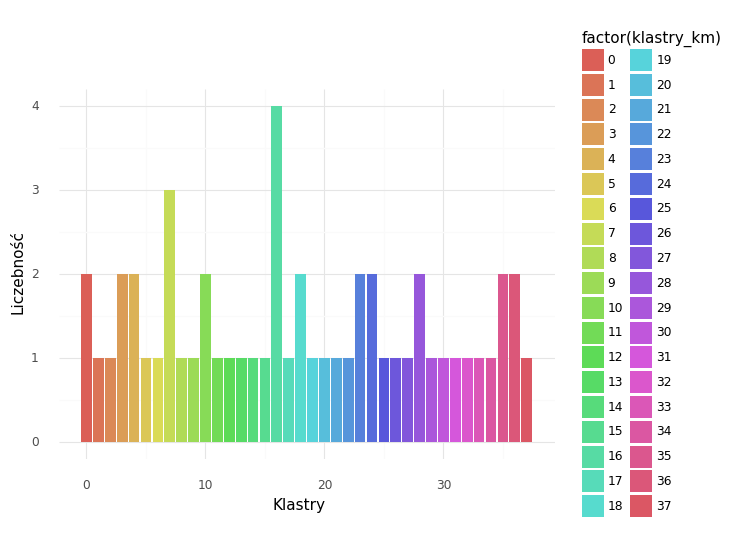

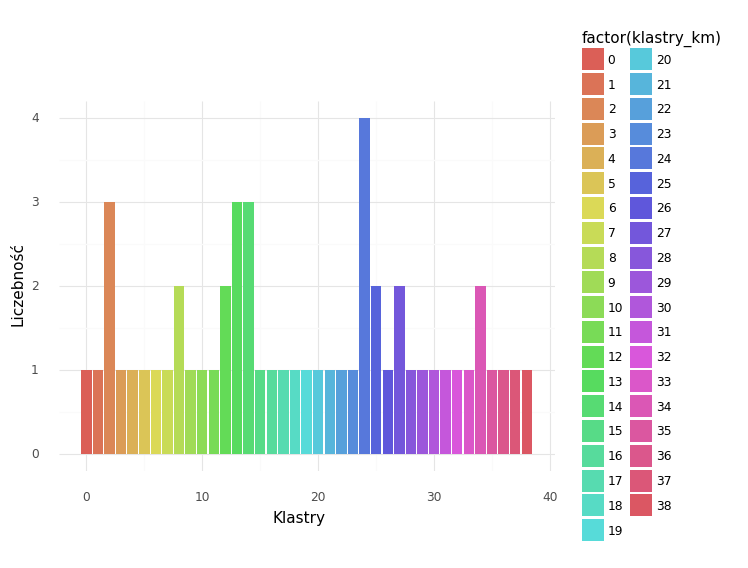

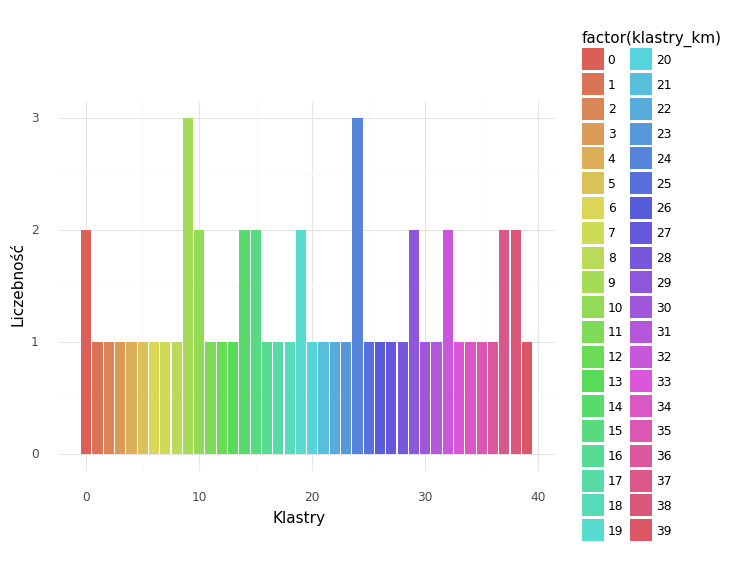

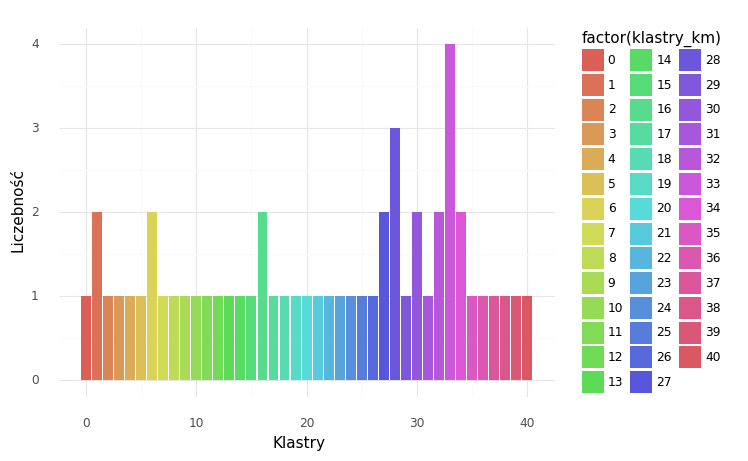

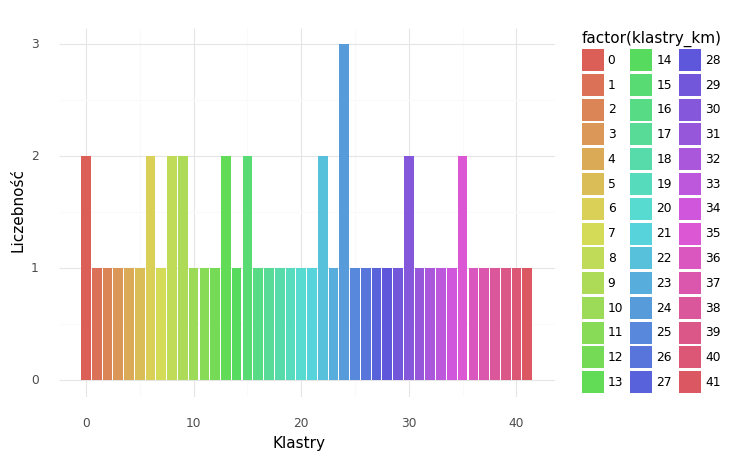

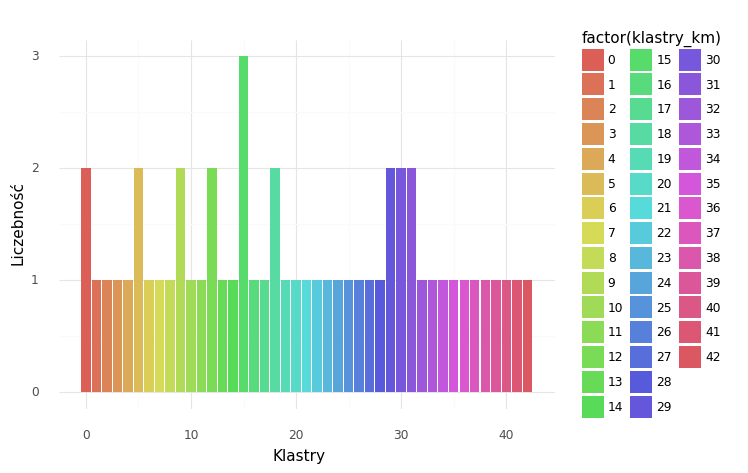

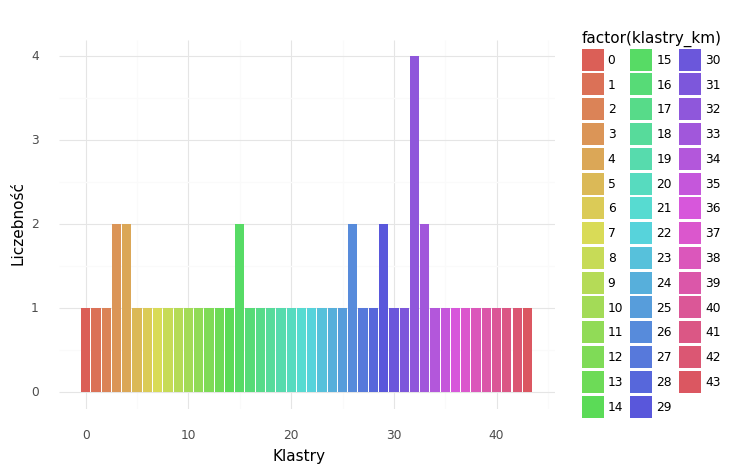

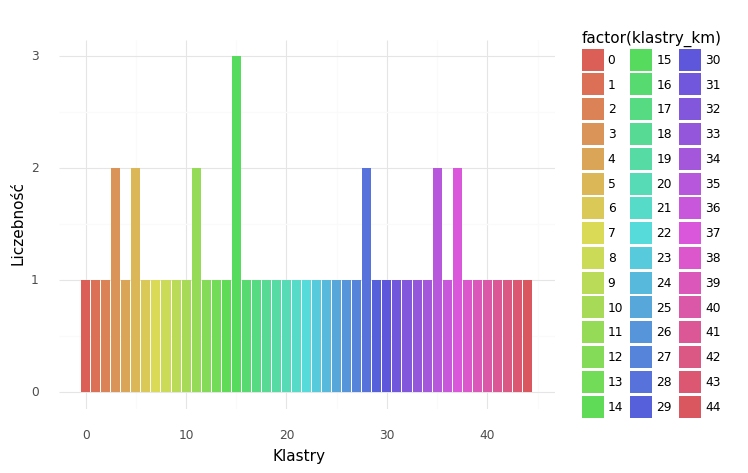

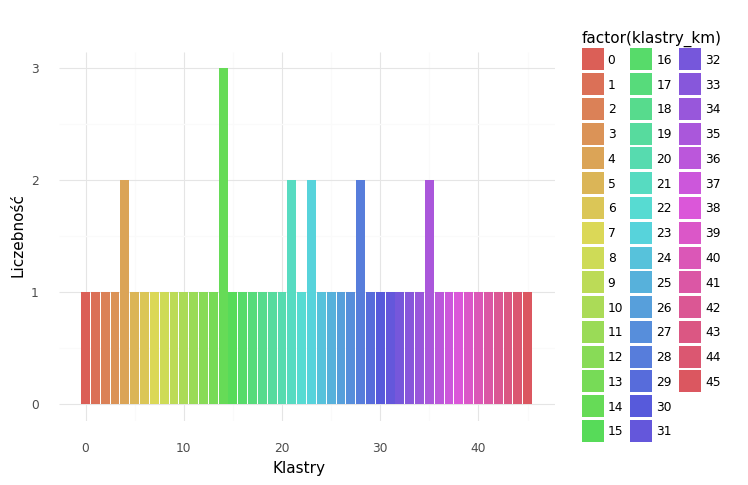

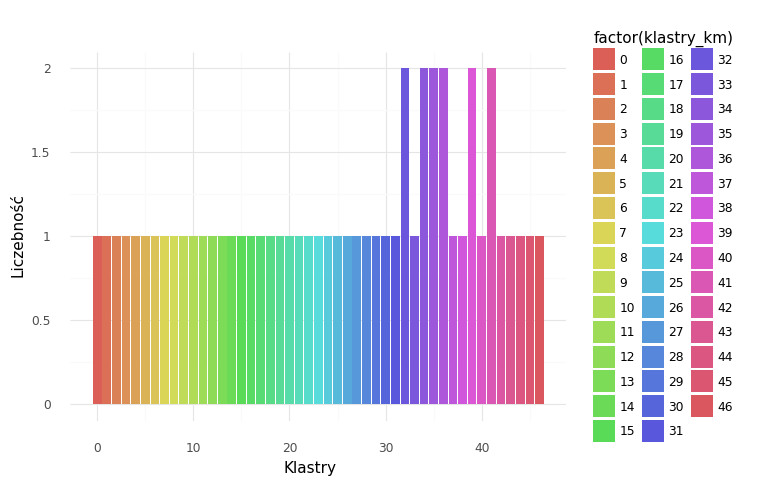

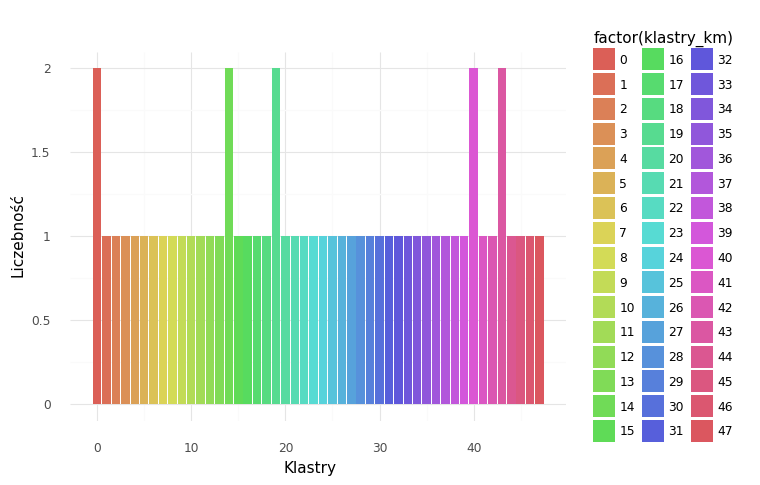

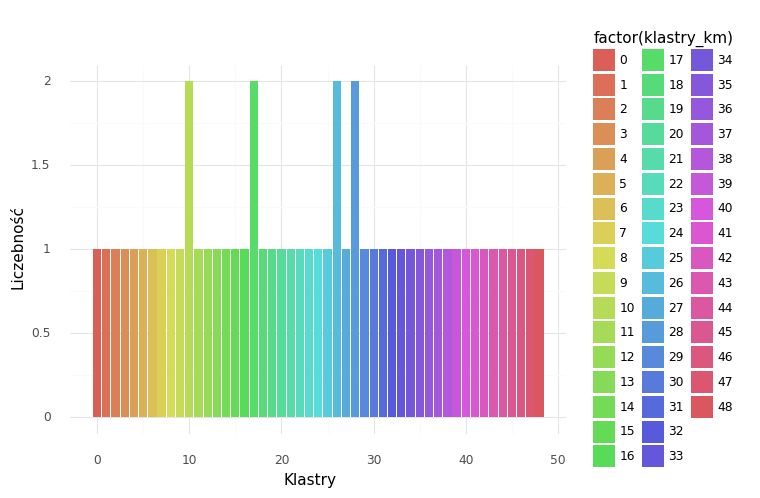

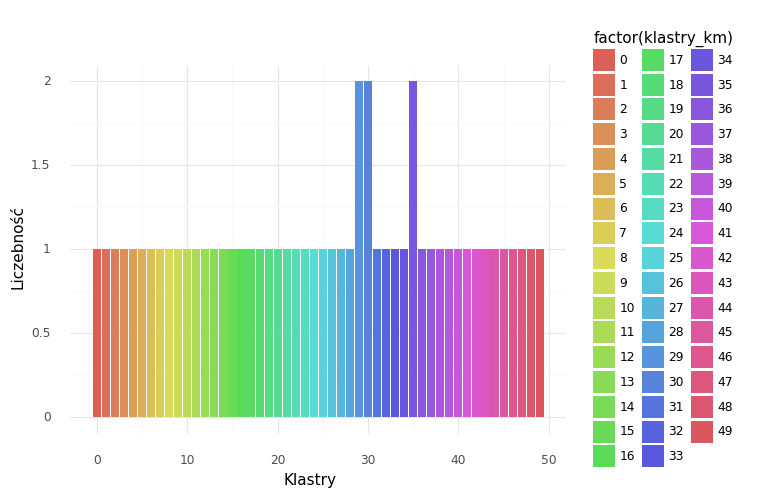

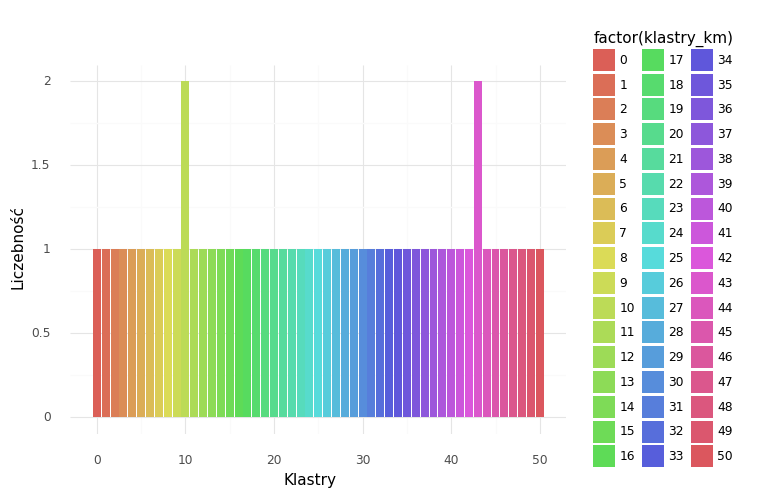

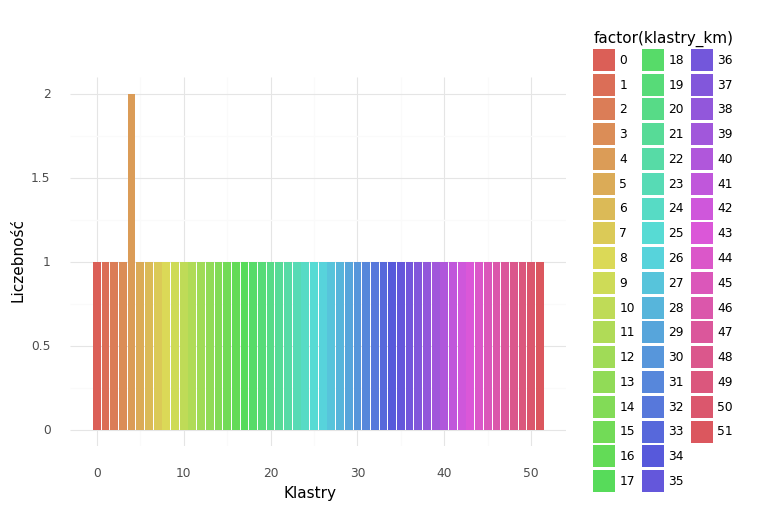

In [ ]:
Sylwetka_km_List = []
for i in range(2,len(df)):
  km = KMeans(n_clusters = i).fit(auta)
  df['klastry_km'] = km.labels_

  sylwetka_km = round(silhouette_score(auta, km.labels_), 4)
  Sylwetka_km_List.append(sylwetka_km)
  print(
  (ggplot(df, aes(x = 'klastry_km', fill = 'factor(klastry_km)')) +
  geom_bar() + 
  theme_minimal() +
  labs(x = 'Klastry', y='Liczebność')
  )
  )

Moim zdaniem na podstawie tych wykresów możemy zauważyć, że kolejne klastry powodują dość często wyodrębnianie się małych grup, dość szybko jedno elementowych. Dla n=6 mamy już jeden klaster o ilości elementów 1 oraz jeden klaster o ilości elementów 2. Czyli tak naprawdę są wyodrębniane pojedyncze elementy, w pewien sposób "specjalne", a nie większe grupy, mające podobne cechy.

In [ ]:
Sylwetka_km_List

[0.6241,
 0.3495,
 0.2855,
 0.2968,
 0.2898,
 0.291,
 0.2607,
 0.2558,
 0.2726,
 0.2521,
 0.2659,
 0.2584,
 0.2656,
 0.2806,
 0.2585,
 0.2561,
 0.2624,
 0.2311,
 0.2513,
 0.2443,
 0.2497,
 0.2473,
 0.2509,
 0.2345,
 0.2464,
 0.2361,
 0.2332,
 0.2061,
 0.2249,
 0.1994,
 0.2228,
 0.2075,
 0.1937,
 0.1873,
 0.1675,
 0.1635,
 0.1528,
 0.1238,
 0.1333,
 0.121,
 0.1241,
 0.1146,
 0.0991,
 0.0975,
 0.0801,
 0.0693,
 0.0606,
 0.0542,
 0.0395,
 0.0262,
 0.0101]

Możemy zauważyć ile wynoszą wartości sylwetki dla kolejnej ilości klastrów n. Zastanawia mnie jednak, dlaczego ostatnia wartość nie jest bliska 1. Skoro wiemy, że grupy są jednoelementowe to we wzorze na sylwetkę a=0 oraz oczywiście a < b .  To powinniśmy dostać (b-a)/b = 1 - a/b. --> 1. To pozostawiam jednak do rozważań i konsultacji. 

### GMM

W tym przypadku przeprowadzona została analiza z wykorzystaniem metody GMM dla 3 komponentów.

In [ ]:
gm = GaussianMixture(n_components = 3).fit(auta)

df['klastry_gm'] = gm.predict(auta)

sylwetka_gm= round(silhouette_score(auta, gm.predict(auta)), 4)
sylwetka_gm


0.176

Widać, że wartośc sylwetki znacząco się pogorszyła (jest bliższa zeru).

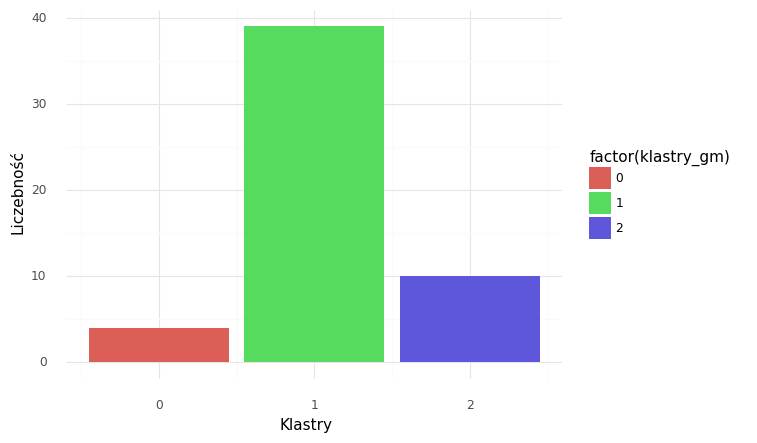

<ggplot: (8746870810121)>

In [ ]:
(ggplot(df, aes(x = 'klastry_gm', fill = 'factor(klastry_gm)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

Jak widać tutaj otrzymaliśmy po raz kolejny klaster do którego należy tylko kilka obiektów. Drugi klaster jest już trochę bardziej liczny, ale nadal, nie jest on połową pozostałych obiektów. Oraz trzeci klaster, do którego znowu należy znacząca większość obiektów.

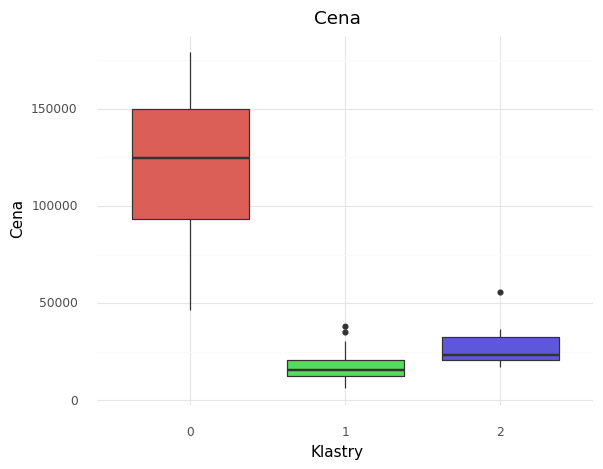

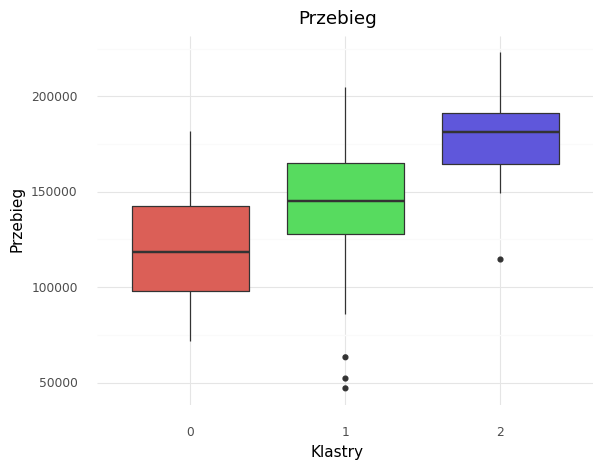

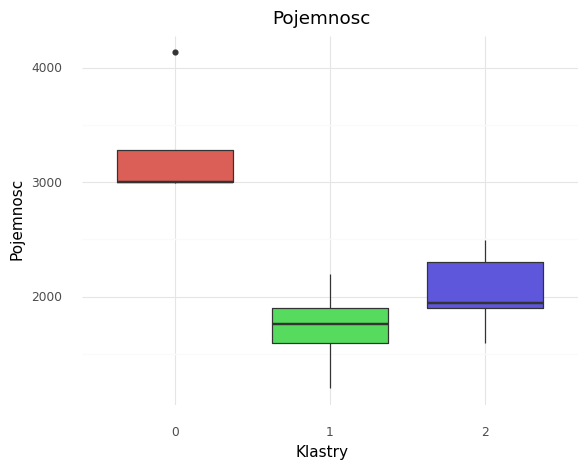

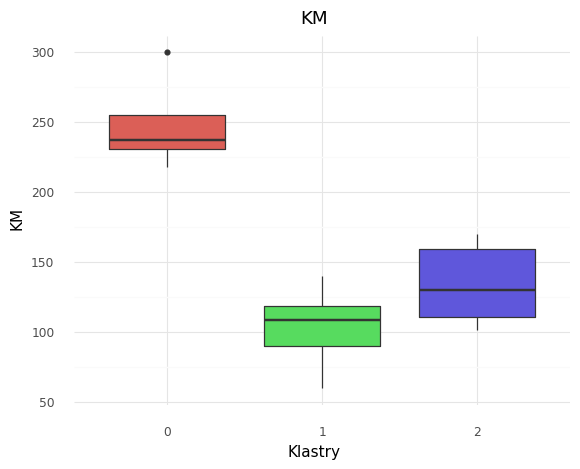

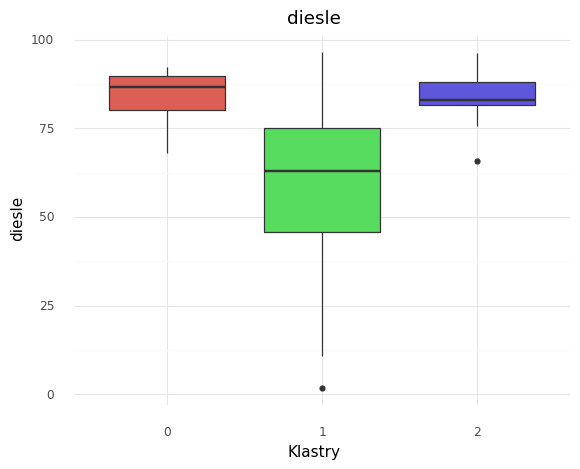

In [ ]:
for zm in df.columns[:-3]:
  print((ggplot(df, aes(x='factor(klastry_gm)', y= zm, fill = 'factor(klastry_gm)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

Grupa 0 charakteruzyje się wyższą ceną, niższym przebiegiem, wyższą pojemnością silnika oraz większą ilośćią KM. Do tej grupy należy tylko kilka obiektów, wszystkie te cechy mogą świadczyć o tym, że do tej grupy należą auta "Premium".

Grupa 1 charateryzuje się najniższą ceną, wyższym przebiegiem, małą pojemnością silnika, mniejszą ilością KM. - Do tej grupy należy największa część badanych obiektów.

Grupa 2 charakteryzuje się troche wyższą ceną niż Grupa 1. Ale również większym przebiegiem i pojemnością silnika. Po raz kolejny moga to być "lepsze auta" ponieważ mimo większego przebiegu, mają większą cenę. Mają one również większa pojemność silnika.



Następnie został pokazany wykres wartości dwóch parametrów, które najbardziej różnicują otrzymane grupy.


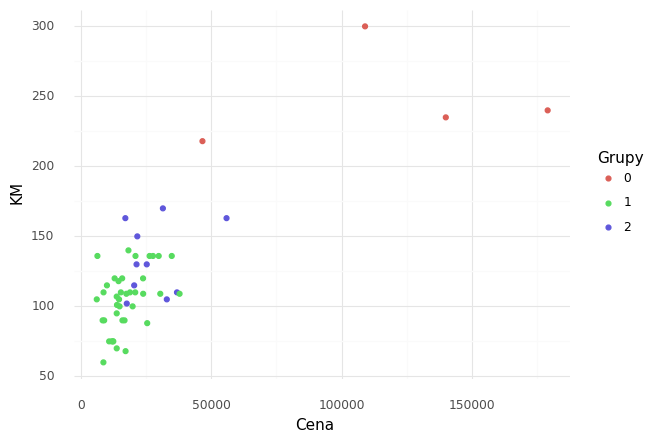

<ggplot: (8746869207341)>

In [ ]:
(ggplot(df,aes(x='Cena', y='KM', color = 'factor(klastry_gm)')) + #factor tworzy 0/1 zmienne
 geom_point() +
 theme_minimal() +
 labs(color = 'Grupy'))


Wykres obrazuje, że faktycznie Grupa0 jest odosobniona dzięki tym dwóm parametrom. Jest do grupa dla których Cena > 60000 & KM > 200. Grupa2 jest jednak dużo bardziej zbliżona do Grupy1, przynajmniej ze względu na te dwie cechy. Widać, że obiekty tych dwóch grup są dużo bardziej wymieszane.

Zobaczmy jakie to są samochody, których cena jest większ od 60000.

In [ ]:
df[df['Cena']>60000]

,Cena,Przebieg,Pojemnosc,KM,diesle,klastry_km,klastry_gm,klastry_db
Audi A8,109000.0,129380.0,4134.0,300,68.1,1,0,-1
Audi Q7,179000.0,72000.0,3000.0,240,89.1,1,0,-1
BMW X5,139949.5,107000.0,2993.0,235,84.1,1,0,-1


Faktycznie są to samochody najlepszych marek, grupę0 można by więc faktycznie określić jako samochody premium.

### DBSCAN

W tej analizie udało się otrzymać dwa klastry bardzo podobne co do liczności.

Tu dobrze byłoby poszukac trzech klastrów bo -1 to szum

In [ ]:
db = DBSCAN(eps = 0.9, min_samples = 10 ).fit(auta)
df['klastry_db'] = db.labels_

sylwetka_db = round(silhouette_score(auta, db.labels_), 4)
sylwetka_db

0.1573

Niestety wartość sylwetki jest niska.

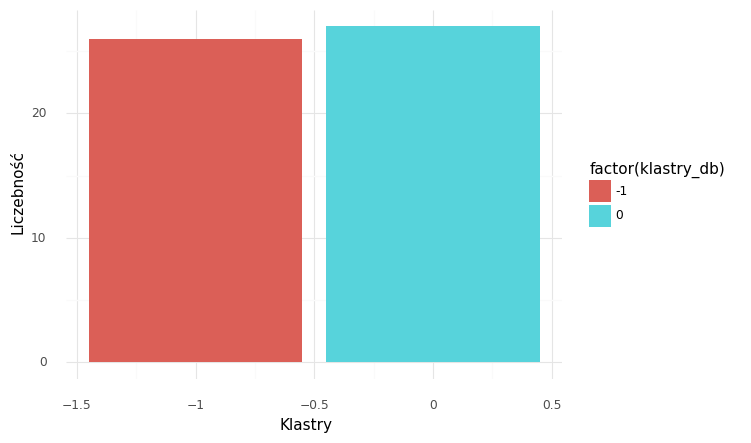

<ggplot: (8746870999929)>

In [ ]:

(ggplot(df, aes(x = 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

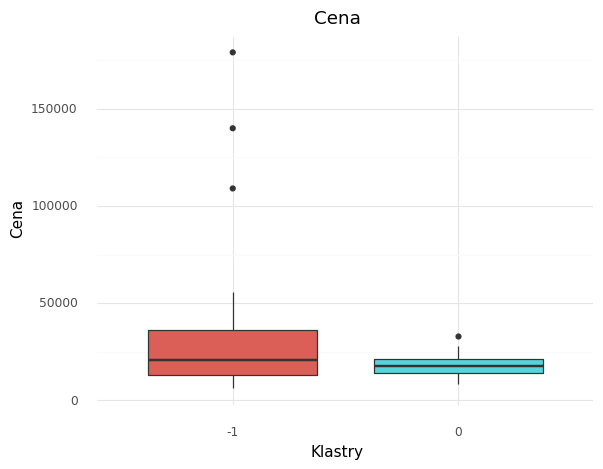

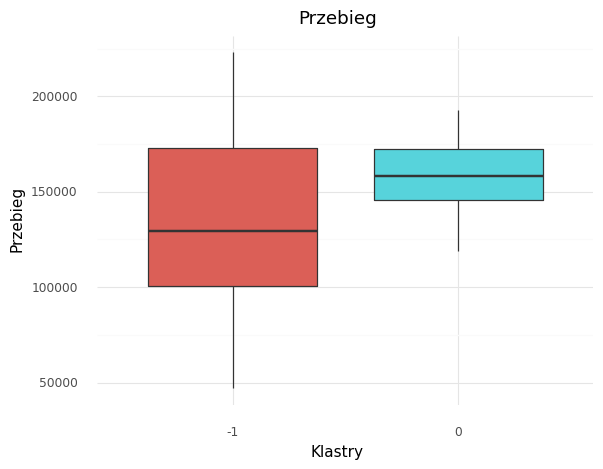

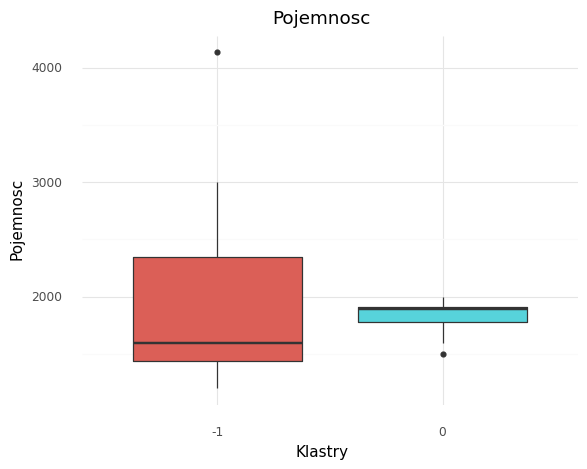

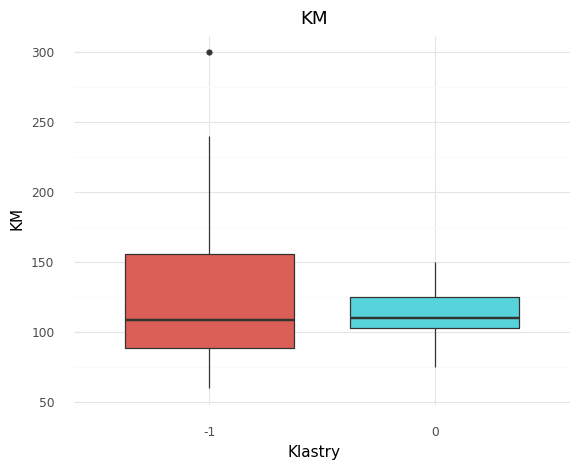

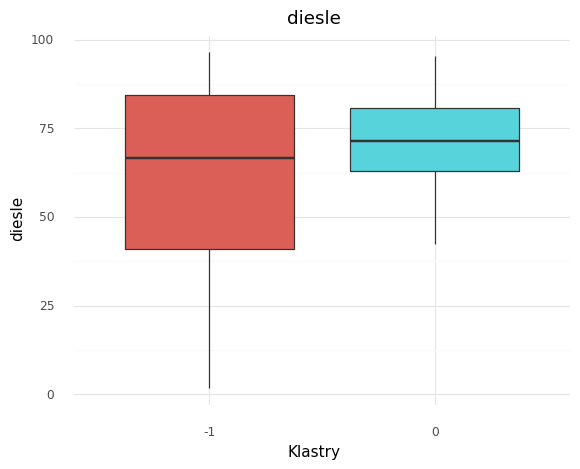

In [ ]:
for zm in df.columns[:-3]:
  print((ggplot(df, aes(x='factor(klastry_db)', y= zm, fill = 'factor(klastry_db)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

Co jednak interesujące widać, że wszystkie atrybuty w dwóch klasach są do siebie w pewien sposób podobne. Czyli mimo stworzenia dwóch prawie równolicznych klastrów tak naprawdę mamy do czynienia cały czas z jednolitą grupą. Żadna z grup się nie wyróżnia.

### Każdą z analiz możnaby wykonywac dla każdego z poszczególnych algorytmów. Nie ma tu ograniczeń co do długości analiz. Jedynym ograniczeniem jest nasza wyobraźnia. Choć może być nim jeszcze czas. Oczywiście w rzeczywistości będziemy tworzyć takie analizy, które są potrzebne ze względu na cele biznesowe.